In [5]:
# 1. Load the dataset into a pandas dataframe. Name the variable as “survey”
import pandas as pd
import numpy as np

In [7]:
data=pd.read_excel("Sample Survey.xlsx",'Data')

In [8]:
survey=pd.DataFrame(data)
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [9]:
# 2. How many samples were collected on each day?
samples_day=survey.groupby("collection_date").size()
print(samples_day)

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
dtype: int64


In [12]:
# 3. What proportion of the total respondents were aged less than 45?
survey['age'] = pd.to_numeric(survey['age'], errors='coerce')
ques_three=survey[survey['age'] < 45]
p=len(ques_three)/len(survey)
print(p)

0.9317023445463812


In [25]:
4. # Create a new column in the dataframe “age_group”. This column should contain the age

age=[18, 25, 40, 55, float('inf')]
labels=['18-25', '25-40', '40-55', '55+']

survey['age_group'] = pd.cut(survey['age'], bins=age, labels=labels, right=False)
print(survey[['age', 'age_group']].head())


    age age_group
0  26.0     25-40
1  34.0     25-40
2  25.0     25-40
3  36.0     25-40
4  22.0     18-25


In [26]:
# 5. How many samples were collected for each age-group? Which age-group had the most samples?
samples_age=survey.groupby("age_group").size()
print(samples_age)

max_samples=samples_age.idxmax()
print(max_samples)

age_group
18-25    2093
25-40    3844
40-55     801
55+       128
dtype: int64
25-40


In [28]:
# 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?
rjd=survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]
prt=len(rjd)/len(survey)
print(prt)

0.1181010630551915


In [29]:
# 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM
cm=survey.groupby('collection_date')['CM_satisfaction'].apply(lambda x: (x == 'Fully Satisfied').mean())
print(cm)


collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Name: CM_satisfaction, dtype: float64


In [30]:
# 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis
import matplotlib.pyplot as plt

collection_date
2020-08-24    0.599730
2020-08-25    0.631263
2020-08-26    0.590301
2020-08-27    0.606015
2020-08-28    0.607096
2020-08-29    0.564516
2020-08-30    0.620275
2020-08-31    0.576302
2020-09-01    0.634267
Name: MLA_satisfaction, dtype: float64


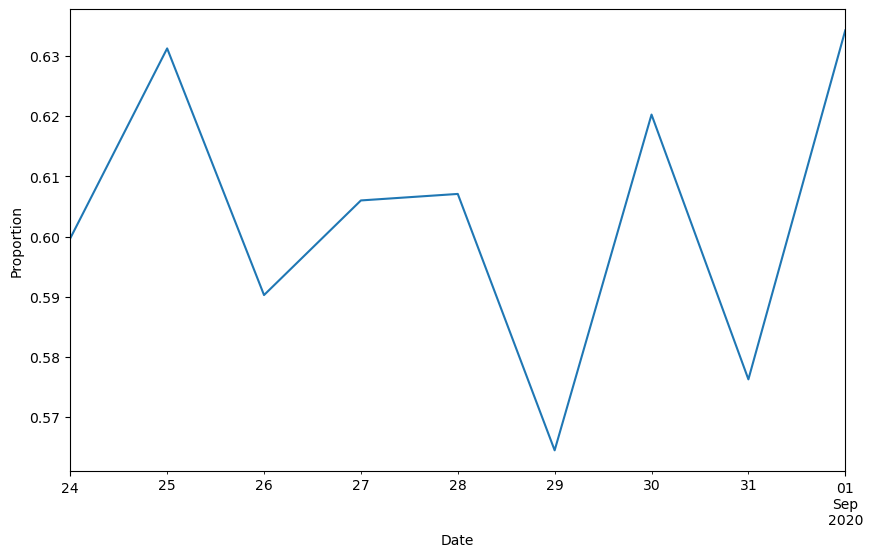

In [31]:
z=survey.groupby('collection_date')['MLA_satisfaction'].apply(lambda x: (x == 'Fully Dissatisfied').mean())
print(z)

plt.figure(figsize=(10, 6))
mla.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

In [33]:
#9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
pivot_table=pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now', aggfunc='size', fill_value=0)
print(pivot_table)

Vote_Now      AAP  AIMIM   BJP  BSP  HAM  INC  JAP(L)  JD(U)  LJP  Left Front  \
Past_Vote                                                                       
BJP             7      1  1630    3    5   42     101    110   44          13   
BSP             0      1     2    5    0    1       0      0    0           0   
Did not vote    8      5   231    2    1   22      41     69   10          16   
HAM             2      0    25    0    1    0       3      2    2           0   
INC             0      6     6    0    0   57      10      9    0           3   
JAP(L)          0      0     4    0    0    0      35      0    0           0   
JD(U)           6     10   254    2    2   45      72    279   29           9   
LJP             0      0    76    1    0    4       3      6    9           2   
Left Front      0      1     2    0    0    1       0      0    0          18   
NOTA            0      1    29    1    0    9       7      7    3           5   
Others          1      5    

In [34]:
# 10. Repeat the above question with the cell values as the sum of “weight”.

pivot_t2=pd.pivot_table(survey, index='Past_Vote', columns='Vote_Now', values='weight', aggfunc='sum', fill_value=0)
print(pivot_t2)

Vote_Now            AAP      AIMIM          BJP        BSP        HAM  \
Past_Vote                                                               
BJP            4.807335   0.349996  1049.344112   0.452551  10.171283   
BSP            0.000000   1.654731     5.174487  32.010277   0.000000   
Did not vote   8.865896   5.379527   114.203906   3.329611   2.497170   
HAM            0.312607   0.000000    25.348884   0.000000   1.648856   
INC            0.000000  11.105958     1.642875   0.000000   0.000000   
JAP(L)         0.000000   0.000000     6.512846   0.000000   0.000000   
JD(U)         12.457216  29.198610   156.243100  11.005903   2.639574   
LJP            0.000000   0.000000    85.010450   2.481377   0.000000   
Left Front     0.000000   2.298223     0.209586   0.000000   0.000000   
NOTA           0.000000   1.061204    12.685435   0.051485   0.000000   
Others        13.661335  21.212705    34.866218   0.684568   1.505864   
RJD            5.515847  24.149369    32.285093   0

In [36]:
# 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group. 
age_s=survey.groupby('age_group').size().reset_index(name='total_samples')
print(age_s)

age_df=pd.DataFrame(age_s)
age_df

  age_group  total_samples
0     18-25           2093
1     25-40           3844
2     40-55            801
3       55+            128


,age_group,total_samples
0,18-25,2093
1,25-40,3844
2,40-55,801
3,55+,128


In [37]:
# 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.
jdu=survey[survey['Vote_Now'] == 'JD(U)']
jdu_samples= jdu.groupby('age_group').size().reset_index(name='jd_u_samples_count')
print(jdu_samples)

jdu_df=pd.DataFrame(jdu_samples)
jdu_df

  age_group  jd_u_samples_count
0     18-25                 180
1     25-40                 264
2     40-55                  68
3       55+                  13


,age_group,jd_u_samples_count
0,18-25,180
1,25-40,264
2,40-55,68
3,55+,13


In [39]:
# 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group
join_df=pd.merge(age_df, jdu_df, on='age_group')
join_df

,age_group,total_samples,jd_u_samples_count
0,18-25,2093,180
1,25-40,3844,264
2,40-55,801,68
3,55+,128,13
